# Espacios Proyectivos y Matrices de Proyección
---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

---
## Generación de Puntos 3D 

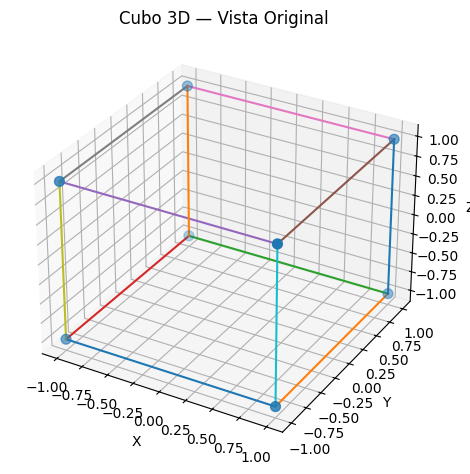

In [4]:
# 8 vertices de un cubo centrado en el origen
vertices = np.array([
    [-1, -1, -1],
    [ 1, -1, -1],
    [ 1,  1, -1],
    [-1,  1, -1],
    [-1, -1,  1],
    [ 1, -1,  1],
    [ 1,  1,  1],
    [-1,  1,  1]
], dtype=float) 

# aristas del cubo
edges = [
    (0,1),(1,2),(2,3),(3,0), 
    (4,5),(5,6),(6,7),(7,4), 
    (0,4),(1,5),(2,6),(3,7) 
]

def plot_cube_3d(verts, title="Cubo 3D"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i, j in edges:
        ax.plot(*zip(verts[i], verts[j]))
    ax.scatter(verts[:,0], verts[:,1], verts[:,2], s=50)
    ax.set_title(title)
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    plt.tight_layout()
    plt.show()

plot_cube_3d(vertices, "Cubo 3D — Vista Original")

---
## Proyección Ortogonal

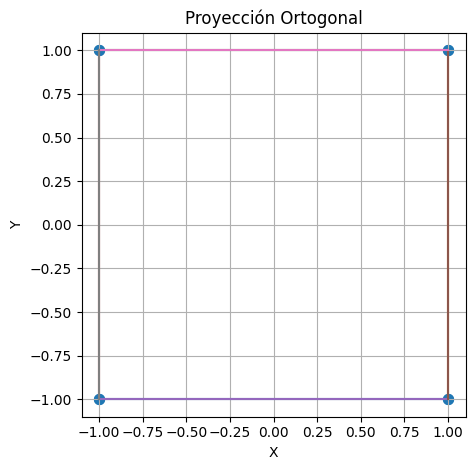

In [5]:
# convertir a coordenadas homogéneas
ones = np.ones((vertices.shape[0], 1))
vertices_h = np.hstack([vertices, ones]) 

# matriz de proyección ortogonal
M_ortho = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 1]
])

proj_ortho_h = (M_ortho @ vertices_h.T).T 
w = proj_ortho_h[:, 3:4]
proj_ortho = proj_ortho_h[:, :2] / w  

fig = plt.figure()
ax = fig.add_subplot(111)
for i, j in edges:
    ax.plot(*zip(proj_ortho[i], proj_ortho[j]))
ax.scatter(proj_ortho[:,0], proj_ortho[:,1], s=50)
ax.set_title("Proyección Ortogonal")
ax.set_xlabel('X'); ax.set_ylabel('Y')
ax.set_aspect('equal')
ax.grid(True)
plt.tight_layout()
plt.show()

### Efecto visual de la Matriz Ortogonal sobre los puntos

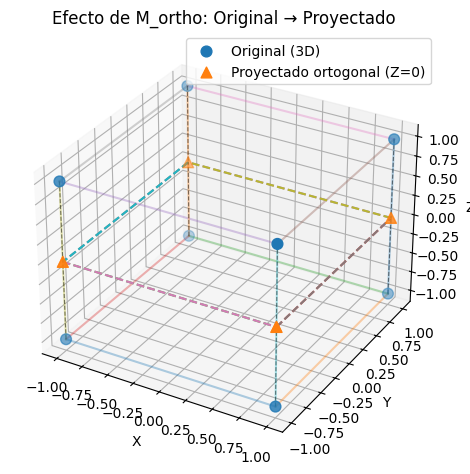

In [6]:
# proyectados en 3D con Z=0 para dibujar en el mismo espacio que los originales
proj_ortho_3d = np.column_stack([proj_ortho, np.zeros(len(proj_ortho))])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# aristas y puntos originales
for i, j in edges:
    ax.plot(*zip(vertices[i], vertices[j]), alpha=0.35)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], s=60, label='Original (3D)')

# aristas y puntos proyectados 
for i, j in edges:
    ax.plot(*zip(proj_ortho_3d[i], proj_ortho_3d[j]), linestyle='--', alpha=0.9)
ax.scatter(proj_ortho_3d[:,0], proj_ortho_3d[:,1], proj_ortho_3d[:,2],
           s=60, marker='^', label='Proyectado ortogonal (Z=0)')

# líneas de correspondencia
for k in range(len(vertices)):
    ax.plot(
        [vertices[k,0], proj_ortho_3d[k,0]],
        [vertices[k,1], proj_ortho_3d[k,1]],
        [vertices[k,2], proj_ortho_3d[k,2]],
        'k--', linewidth=0.8, alpha=0.5
    )

ax.set_title('Efecto de M_ortho: Original → Proyectado')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.legend()
plt.tight_layout()
plt.show()

---
## Proyección Perspectiva

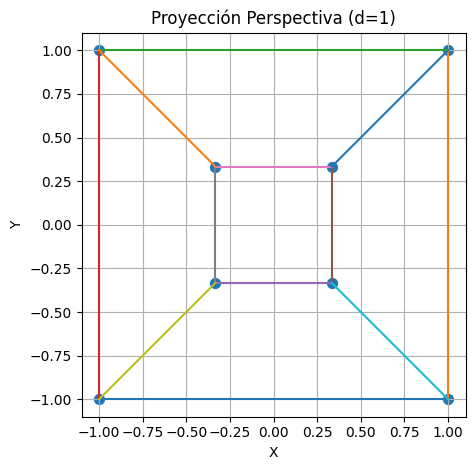

In [7]:
def matriz_perspectiva(d):
    return np.array([
        [1, 0, 0,     0],
        [0, 1, 0,     0],
        [0, 0, 1,     0],
        [0, 0, 1/d,   0]
    ])

def proyectar_perspectiva(verts_h, d):
    M = matriz_perspectiva(d)
    proj_h = (M @ verts_h.T).T         
    w = proj_h[:, 3:4]                  
    proj = proj_h[:, :2] / w            
    return proj

def plot_proyeccion_2d(proj, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i, j in edges:
        ax.plot(*zip(proj[i], proj[j]))
    ax.scatter(proj[:,0], proj[:,1], s=50)
    ax.set_title(title)
    ax.set_xlabel('X'); ax.set_ylabel('Y')
    ax.set_aspect('equal')
    ax.grid(True)
    plt.tight_layout()
    plt.show()

# trasladar el cubo en Z para que esté frente a la cámara
vertices_frente = vertices.copy()
vertices_frente[:, 2] += 2 
ones = np.ones((vertices_frente.shape[0], 1))
verts_h = np.hstack([vertices_frente, ones])

# proyección perspectiva con d=1
d = 1
proj_persp = proyectar_perspectiva(verts_h, d)
plot_proyeccion_2d(proj_persp, f"Proyección Perspectiva (d={d})")

### Efecto visual de la Matriz Perspectiva sobre los puntos

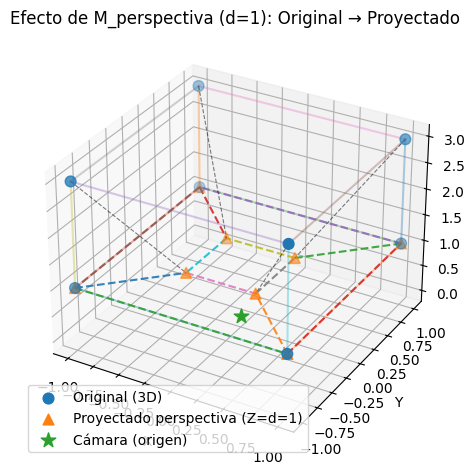

In [8]:
# proyección perspectiva con d=1 
d_efecto = 1
proj_persp_efecto = proyectar_perspectiva(verts_h, d_efecto)

# puntos proyectados en el plano Z=d
proj_persp_3d = np.column_stack([proj_persp_efecto, np.full(len(proj_persp_efecto), d_efecto)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# aristas y vértices originales
for i, j in edges:
    ax.plot(*zip(vertices_frente[i], vertices_frente[j]), alpha=0.35)
ax.scatter(vertices_frente[:,0], vertices_frente[:,1], vertices_frente[:,2],
           s=60, label='Original (3D)')

# aristas y vértices proyectados
for i, j in edges:
    ax.plot(*zip(proj_persp_3d[i], proj_persp_3d[j]), linestyle='--', alpha=0.9)
ax.scatter(proj_persp_3d[:,0], proj_persp_3d[:,1], proj_persp_3d[:,2],
           s=60, marker='^', label=f'Proyectado perspectiva (Z=d={d_efecto})')

for k in range(len(vertices_frente)):
    ax.plot(
        [vertices_frente[k,0], proj_persp_3d[k,0]],
        [vertices_frente[k,1], proj_persp_3d[k,1]],
        [vertices_frente[k,2], proj_persp_3d[k,2]],
        'k--', linewidth=0.8, alpha=0.5
    )

ax.scatter([0], [0], [0], s=120, marker='*', label='Cámara (origen)')

ax.set_title(f'Efecto de M_perspectiva (d={d_efecto}): Original → Proyectado')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.legend()
plt.tight_layout()
plt.show()

---
## Experimento: Variación de `d`

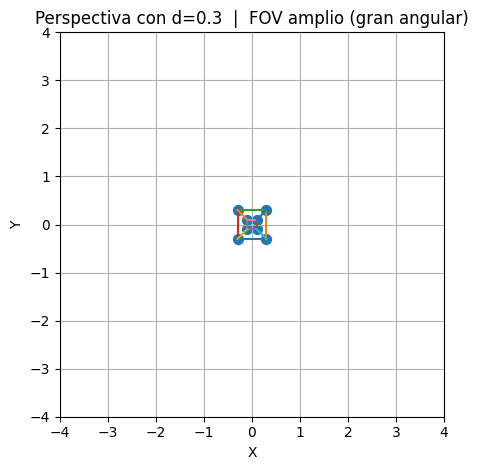

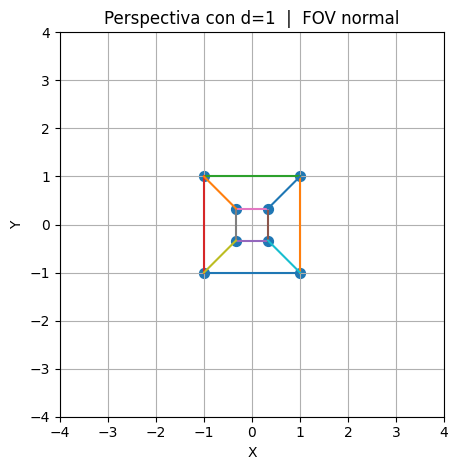

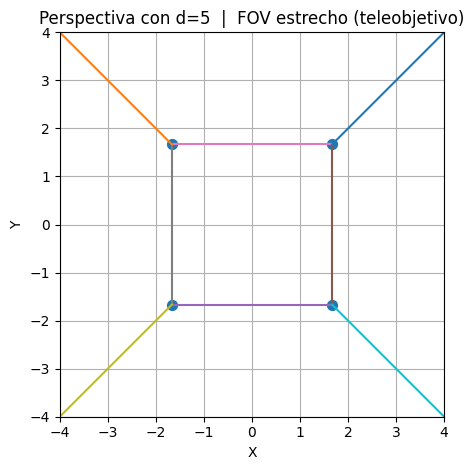

In [9]:
valores_d = [0.3, 1, 5]

for d_val in valores_d:
    proj = proyectar_perspectiva(verts_h, d_val)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i, j in edges:
        ax.plot(*zip(proj[i], proj[j]))
    ax.scatter(proj[:,0], proj[:,1], s=50)
    ax.set_title(f"Perspectiva con d={d_val}  |  FOV {'amplio (gran angular)' if d_val < 1 else 'estrecho (teleobjetivo)' if d_val > 1 else 'normal'}")
    ax.set_xlabel('X'); ax.set_ylabel('Y')
    ax.set_xlim(-4, 4); ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid(True)
    plt.tight_layout()
    plt.show()